In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["axes.unicode_minus"] = False
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes",unicode_minus=False)
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from graphviz import Source
import warnings
import re
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from statsmodels.api import qqplot
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

사용자 정의 함수

In [83]:
def print_countplot(data, hue = None):
    fig, ax = plt.subplots(figsize=(6, 6))

    column = data.columns[0]
    sorted_data = data.sort_values(by=column)
    sns.countplot(x = column, hue = hue, data = sorted_data, dodge = False, ax = ax)

    ax.set_title(column)
    
    #각 데이터에 수치를 쓰는 부분
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    plt.xlabel("{}".format(column))
    plt.ylabel("{}".format(hue))
    plt.tight_layout()
    plt.show()

In [93]:
#사용자 정의 함수

def fun_plot_hist(data, var):                                      #히스토그램 그리기
    plt.title(var)
    plt.hist(data[data["scale"]=="양품"][var], label = "양품", alpha = 0.7)
    plt.hist(data[data["scale"]=="불량"][var], label = "불량", alpha = 0.7)
    plt.legend()
    
    
def fun_print_crosstab(data, var):                                 #크로스탭(피벗테이블) 만들기
    print(pd.crosstab(index = data["scale"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["scale"], columns = data[var], normalize = "columns").round(3))
    

In [94]:
#이상치 boxplot 여러 개 한 번에 그리는 함수
def print_mulitple_boxplot(data, nrows = 4, ncols = 3):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

    for i, column in enumerate(df_raw_num.columns):
        row = i // ncols
        col = i % ncols
    df_raw_num[[column]].boxplot(ax=axs[row, col])  # Specify the ax parameter
    axs[row, col].set_title(column)

    plt.tight_layout()
    plt.show()

In [99]:
def print_multiple_histogram(data, nrows=4, ncols=3):
    numerical_columns = data.select_dtypes(include='number').columns
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
    axs = axs.ravel()
    
    for i, column in enumerate(numerical_columns):
        sns.histplot(data=data, x=column, hue="scale", bins=15, kde=True, ax=axs[i])
        axs[i].set_title(column)
        axs[i].set_xlabel(column)
        axs[i].set_ylabel("Frequency")
        
    plt.tight_layout()
    plt.show()

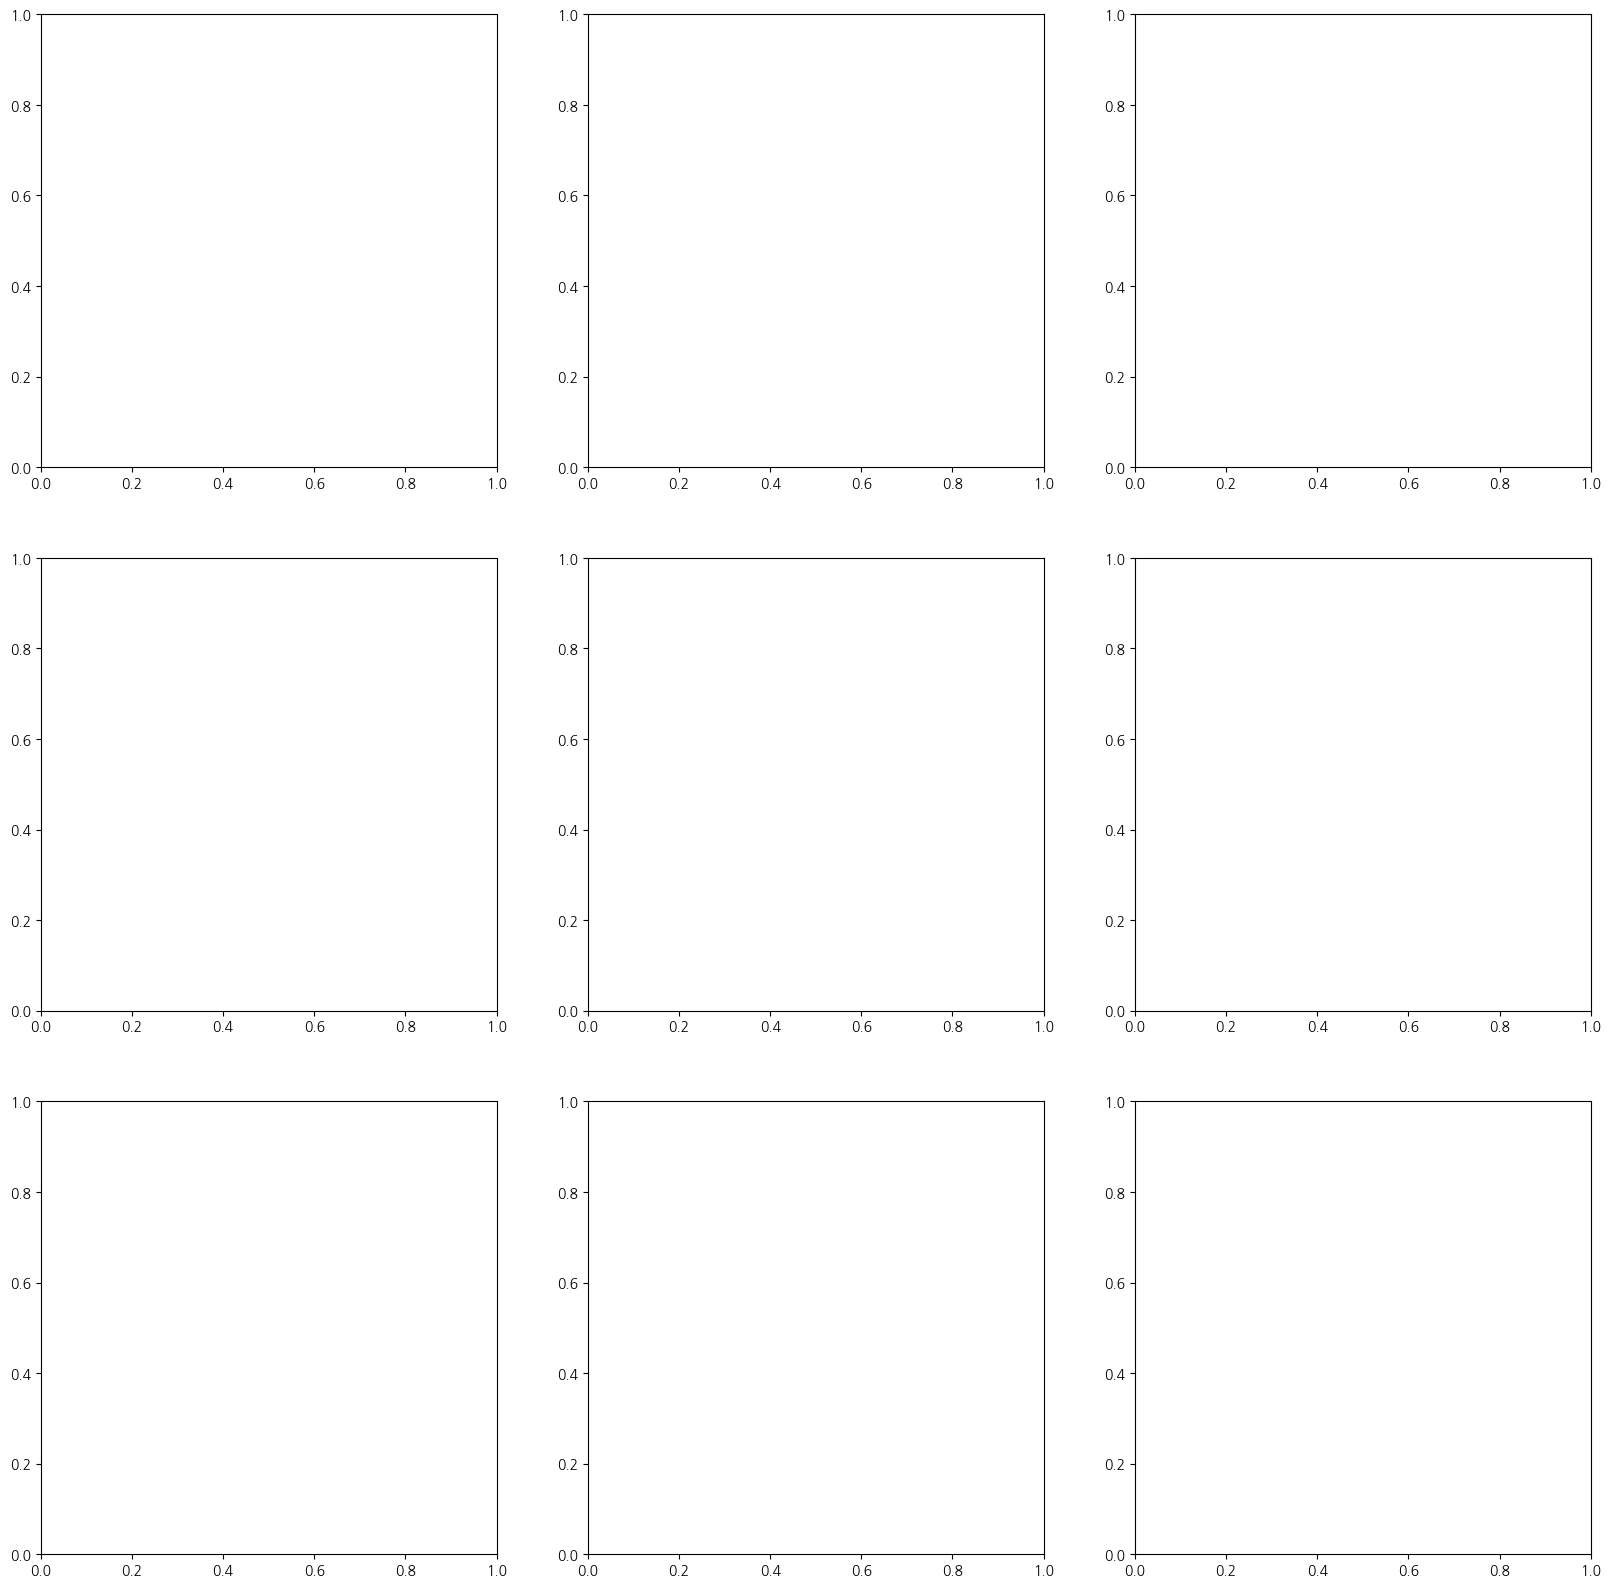

In [96]:
def print_multiple_histogram(data, nrows = 4, ncols = 3):
    for i, column in enumerate(data.select_dtypes(include = "object").columns):
        row = i // 3
        col = i % 3
        df_groupby_total_good = df_raw[df_raw["scale"] == "양품"][column].value_counts()
        df_groupby_total_defective = df_raw[df_raw["scale"] == "불량"][column].value_counts()

        # Get a union of all unique categories in both DataFrames
        all_categories = np.union1d(df_groupby_total_good.index, df_groupby_total_defective.index)

            # Reindex the DataFrames to include all categories and fill missing values with 0
        df_groupby_total_good = df_groupby_total_good.reindex(all_categories, fill_value=0)
        df_groupby_total_defective = df_groupby_total_defective.reindex(all_categories, fill_value=0)

        width = 0.4  # 막대의 폭을 조정
        x = np.arange(len(all_categories))

        axs[row, col].bar(x, df_groupby_total_good.values, width=width, label="양품")
        axs[row, col].bar(x, df_groupby_total_defective.values, width=width, bottom=df_groupby_total_good.values, label="불량", alpha=0.7)

        axs[row, col].set_xticks(x)
        axs[row, col].set_xticklabels(all_categories, rotation=90)
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel(column)
        axs[row, col].set_ylabel("Frequency")
        axs[row, col].legend()
    plt.tight_layout()
    plt.show()

In [97]:
#누적 막대그래프 (hue)
def multiple_barplot(data, x,hue):
    sns.countplot(x = x, hue=hue, data=data, dodge=False)

    plt.title("Count Plot of Categorical Variables")
    plt.xlabel("{}".format(x))
    plt.ylabel("{}".format(hue))

    # 범례 추가
    plt.legend()

    # 그래프 보여주기
    plt.show()

    
#이상치 boxplot 여러 개 한 번에 그리는 함수
def print_countplot(data, nrows=1, ncols=2):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    for i, column in enumerate(data.columns):
        row = i // ncols
        col = i % ncols
        sns.countplot(x=column, data=data, ax=axs[col])
        axs[col].set_title(column)
        for p in axs[col].patches:
            height = int(p.get_height())
            axs[col].annotate(f'{height}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.tight_layout()
    plt.show()

In [61]:
matplotlib.rc("font",family = 'NanumGothic')
matplotlib.rc('axes',unicode_minus = False)

파일 읽어오기

In [84]:
df_items_raw = pd.read_csv("C:/Users/hanseokhyun/Desktop/빅데이터 프로젝트/cvs_items.csv")
df_weather_raw = pd.read_csv("C:/Users/hanseokhyun/Desktop/빅데이터 프로젝트/cvs_weather.csv", encoding = 'cp949')
df_sales_raw = pd.read_csv("C:/Users/hanseokhyun/Desktop/빅데이터 프로젝트/cvs_sales.csv")
df_users_raw = pd.read_csv("C:/Users/hanseokhyun/Desktop/빅데이터 프로젝트/cvs_users.csv", encoding = 'cp949')

In [85]:
df_items_raw.describe()

,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemId,ItemName,Item_CatORMaker,Price,ImageUrl
count,4308,4308,4308,4308,4308,4303,4296,4280,2918
unique,6,6,3,1380,4306,3053,372,1504,2918
top,L5,식품,M1,가공식,롯데)카스타드6입,롯데,1500,2000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
freq,1531,1531,2128,711,2,181,268,186,1


In [86]:
df_items_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ItemIdLarge      4308 non-null   object
 1   ItemNameLarge    4308 non-null   object
 2   ItemIdMiddle     4308 non-null   object
 3   ItemNameMiddle   4308 non-null   object
 4   ItemId           4308 non-null   object
 5   ItemName         4303 non-null   object
 6   Item_CatORMaker  4296 non-null   object
 7   Price            4280 non-null   object
 8   ImageUrl         2918 non-null   object
dtypes: object(9)
memory usage: 303.0+ KB


In [87]:
df_items_raw.isnull().sum()

ItemIdLarge           0
ItemNameLarge         0
ItemIdMiddle          0
ItemNameMiddle        0
ItemId                0
ItemName              5
Item_CatORMaker      12
Price                28
ImageUrl           1390
dtype: int64

In [89]:
for index, row in df_items_raw.iterrows():
    # df_items_raw columns을 반대로 돌며 실행. 그 column의 이름은 col, 그 column이 뒤에서 부터 몇번째인지는 inv_i_col.
    for inv_i_col, col in enumerate(list(reversed(list(df_items_raw.columns)[0:-1]))): 
        val = row[col] # row 행의 col 열에 있는 값은 val
        if "?" in str(val):  # 만약 row 행의 col 열에 ?값이 있다면 split 해준 후 하나씩 뒤로 밀기.
            # inv_i_col은 뒤에서부터 몇번째 열인지. i_col은 앞에서부터 몇번째 열인지
            i_col = int(len(df_items_raw.columns)-inv_i_col-2) 
            split_res = str(val).split("?") #split
            if inv_i_col==0:  #마지막에서 두번째 열. 즉 price에 ?로 합쳐져있다면 뒤로 밀지는 않고, 잘라서 두개로 나누기만.
                df_items_raw.iloc[index, i_col:i_col+2] = split_res
                break
            df_items_raw.iloc[index, i_col +2 : 9] = df_items_raw.iloc[index, i_col+1 : -1]  # 하나씩 밀기
            df_items_raw.iloc[index, i_col:i_col+2] = split_res # 잘라서 지금, 그 다음 행에 넣기

In [91]:
df_items_raw.to_csv("output.csv", encoding='utf-8', index=False)

In [92]:
df_items_raw

,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemId,ItemName,Item_CatORMaker,Price,ImageUrl
0,L1,간편식사,M1,도시락,I-8801068371857,샐)치킨찹찹샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,L1,간편식사,M1,도시락,I-8801068371864,샐)퀴노아바질샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,L1,간편식사,M1,도시락,I-8801068378887,샐)에그가먼저닭샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,L1,간편식사,M1,도시락,I-8801068388664,샐)흑임자치킨샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,L1,간편식사,M1,도시락,I-8801068389340,면)나폴리탄파스타,면,4000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
...,...,...,...,...,...,...,...,...,...
4303,L6,음료,M3,유제품,I-8809350883903,어른우유검은콩미숫가루,NaN,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4304,L6,음료,M3,유제품,I-8809350884535,서울FB)어른오트호두아몬,서울FB,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4305,L6,음료,M3,유제품,I-8809350885686,서울F&B)하이프로틴초코,서울F&,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4306,L6,음료,M3,유제품,I-8809638770116,헬로)또요플레요거트150m,헬로,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [82]:
df_sales

,idUser,idPOS,SalesDT,SalesDate,ItemId,ItemName
0,U101097,U101097-POS2022-10267,06112022 오후 4:08:48,2022-11-06,I-8809802264069,피)살라미마르게리따피자
1,U101094,U101094-POS2022-10233,1562022 오전 9:25:22,2022-06-15,I-8801068398441,햄)메이플더블치즈버거
2,U101066,U101066-POS2021-10337,3152021 오후 5:19:59,2021-05-31,I-8809558848506,샐)허닭케이준닭가슴살
3,U101092,U101092-POS2021-10177,0292021 오후 11:13:21,2021-09-02,I-8809383955134,주)언리미트채식삼각
4,U101066,U101066-POS2021-10648,09102021 오전 6:51:36,2021-10-09,I-8809196615119,도)고기듬뿍불고기백반
...,...,...,...,...,...,...
509295,U101065,U101065-POS2022-10420,1982022 오후 8:08:15,2022-08-19,I-8809350881183,서울F&B)흑임자우유250ml
509296,U101072,U101072-POS2021-10211,1592021 오전 11:27:20,2021-09-15,I-8806002020242,광동)비타500D병100ml
509297,U101068,U101068-POS2021-10075,2082021 오후 8:51:15,2021-08-20,I-8801037093766,마스터)라떼P500ml
509298,U101072,U101072-POS2021-10210,1492021 오전 11:40:00,2021-09-14,I-8801094963200,코카)스프라이트제로캔35


In [101]:
filtered_df_users_raw = df_users_raw[df_users_raw["idUser"].isin(df_sales_raw["idUser"])]
filtered_df_users_raw

,idUser,Gender,AgeGroup
0,U100001,남성,40대
276,U100277,여성,30대
277,U100278,남성,20대
278,U100279,남성,30대
279,U100280,남성,40대
...,...,...,...
1093,U101094,남성,10대
1094,U101095,남성,40대
1095,U101096,여성,30대
1096,U101097,남성,30대


In [102]:
result = df_sales_raw.merge(filtered_df_users_raw, on='idUser', how='left')
result.head()

,idUser,idPOS,SalesDT,SalesDate,ItemId,ItemName,Gender,AgeGroup
0,U101097,U101097-POS2022-10267,06112022 오후 4:08:48,2022-11-06,I-8809802264069,피)살라미마르게리따피자,남성,30대
1,U101094,U101094-POS2022-10233,1562022 오전 9:25:22,2022-06-15,I-8801068398441,햄)메이플더블치즈버거,남성,10대
2,U101066,U101066-POS2021-10337,3152021 오후 5:19:59,2021-05-31,I-8809558848506,샐)허닭케이준닭가슴살,남성,10대
3,U101092,U101092-POS2021-10177,0292021 오후 11:13:21,2021-09-02,I-8809383955134,주)언리미트채식삼각,여성,20대
4,U101066,U101066-POS2021-10648,09102021 오전 6:51:36,2021-10-09,I-8809196615119,도)고기듬뿍불고기백반,남성,10대


In [108]:
result = df_sales_raw.merge(df_items_raw, on='ItemId', how='left')
result.head()

,idUser,idPOS,SalesDT,SalesDate,ItemId,ItemName_x,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName_y,Item_CatORMaker,Price,ImageUrl
0,U101097,U101097-POS2022-10267,06112022 오후 4:08:48,2022-11-06,I-8809802264069,피)살라미마르게리따피자,L1,간편식사,M2,샌드위,피)살라미마르게리따피자,피자,5500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,U101094,U101094-POS2022-10233,1562022 오전 9:25:22,2022-06-15,I-8801068398441,햄)메이플더블치즈버거,L1,간편식사,M2,샌드위,햄)메이플더블치즈버거,햄버거,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,U101066,U101066-POS2021-10337,3152021 오후 5:19:59,2021-05-31,I-8809558848506,샐)허닭케이준닭가슴살,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,샐러드,3800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,U101092,U101092-POS2021-10177,0292021 오후 11:13:21,2021-09-02,I-8809383955134,주)언리미트채식삼각,L1,간편식사,M3,주먹밥,주)언리미트채식삼각,주먹밥,1300,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,U101066,U101066-POS2021-10648,09102021 오전 6:51:36,2021-10-09,I-8809196615119,도)고기듬뿍불고기백반,L1,간편식사,M1,도시락,도)고기듬뿍불고기백반,도시락,3900,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [109]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509300 entries, 0 to 509299
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   idUser           509300 non-null  object
 1   idPOS            509300 non-null  object
 2   SalesDT          509300 non-null  object
 3   SalesDate        509300 non-null  object
 4   ItemId           509300 non-null  object
 5   ItemName_x       509300 non-null  object
 6   ItemIdLarge      509300 non-null  object
 7   ItemNameLarge    509300 non-null  object
 8   ItemIdMiddle     509300 non-null  object
 9   ItemNameMiddle   509300 non-null  object
 10  ItemName_y       509300 non-null  object
 11  Item_CatORMaker  507224 non-null  object
 12  Price            509300 non-null  object
 13  ImageUrl         509300 non-null  object
dtypes: object(14)
memory usage: 58.3+ MB


In [110]:
result.drop("ItemName_x",axis=1,inplace = True)

In [114]:
result.rename(columns={'ItemName_y': 'ItemName'}, inplace=True)

In [115]:
result

,idUser,idPOS,SalesDT,SalesDate,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,Price,ImageUrl
0,U101097,U101097-POS2022-10267,06112022 오후 4:08:48,2022-11-06,I-8809802264069,L1,간편식사,M2,샌드위,피)살라미마르게리따피자,피자,5500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,U101094,U101094-POS2022-10233,1562022 오전 9:25:22,2022-06-15,I-8801068398441,L1,간편식사,M2,샌드위,햄)메이플더블치즈버거,햄버거,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,U101066,U101066-POS2021-10337,3152021 오후 5:19:59,2021-05-31,I-8809558848506,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,샐러드,3800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,U101092,U101092-POS2021-10177,0292021 오후 11:13:21,2021-09-02,I-8809383955134,L1,간편식사,M3,주먹밥,주)언리미트채식삼각,주먹밥,1300,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,U101066,U101066-POS2021-10648,09102021 오전 6:51:36,2021-10-09,I-8809196615119,L1,간편식사,M1,도시락,도)고기듬뿍불고기백반,도시락,3900,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U101065,U101065-POS2022-10420,1982022 오후 8:08:15,2022-08-19,I-8809350881183,L6,음료,M3,유제품,서울F&B)흑임자우유250ml,서울F&,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
509296,U101072,U101072-POS2021-10211,1592021 오전 11:27:20,2021-09-15,I-8806002020242,L6,음료,M1,음료,광동)비타500D병100ml,광동,1000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
509297,U101068,U101068-POS2021-10075,2082021 오후 8:51:15,2021-08-20,I-8801037093766,L6,음료,M1,음료,마스터)라떼P500ml,마스터,2600,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
509298,U101072,U101072-POS2021-10210,1492021 오전 11:40:00,2021-09-14,I-8801094963200,L6,음료,M1,음료,코카)스프라이트제로캔35,코카,1700,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [116]:
mask = result['ItemName'].str.contains('\?')
result.loc[mask, 'ItemName'] = result.loc[mask, 'ItemName'].str.replace('\?', '')

result

<>:1: DeprecationWarning: invalid escape sequence '\?'
<>:2: DeprecationWarning: invalid escape sequence '\?'
<>:1: DeprecationWarning: invalid escape sequence '\?'
<>:2: DeprecationWarning: invalid escape sequence '\?'
C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_10624\3851218870.py:1: DeprecationWarning: invalid escape sequence '\?'
  mask = result['ItemName'].str.contains('\?')
C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_10624\3851218870.py:2: DeprecationWarning: invalid escape sequence '\?'
  result.loc[mask, 'ItemName'] = result.loc[mask, 'ItemName'].str.replace('\?', '')


,idUser,idPOS,SalesDT,SalesDate,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,Price,ImageUrl
0,U101097,U101097-POS2022-10267,06112022 오후 4:08:48,2022-11-06,I-8809802264069,L1,간편식사,M2,샌드위,피)살라미마르게리따피자,피자,5500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,U101094,U101094-POS2022-10233,1562022 오전 9:25:22,2022-06-15,I-8801068398441,L1,간편식사,M2,샌드위,햄)메이플더블치즈버거,햄버거,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,U101066,U101066-POS2021-10337,3152021 오후 5:19:59,2021-05-31,I-8809558848506,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,샐러드,3800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,U101092,U101092-POS2021-10177,0292021 오후 11:13:21,2021-09-02,I-8809383955134,L1,간편식사,M3,주먹밥,주)언리미트채식삼각,주먹밥,1300,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,U101066,U101066-POS2021-10648,09102021 오전 6:51:36,2021-10-09,I-8809196615119,L1,간편식사,M1,도시락,도)고기듬뿍불고기백반,도시락,3900,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U101065,U101065-POS2022-10420,1982022 오후 8:08:15,2022-08-19,I-8809350881183,L6,음료,M3,유제품,서울F&B)흑임자우유250ml,서울F&,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
509296,U101072,U101072-POS2021-10211,1592021 오전 11:27:20,2021-09-15,I-8806002020242,L6,음료,M1,음료,광동)비타500D병100ml,광동,1000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
509297,U101068,U101068-POS2021-10075,2082021 오후 8:51:15,2021-08-20,I-8801037093766,L6,음료,M1,음료,마스터)라떼P500ml,마스터,2600,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
509298,U101072,U101072-POS2021-10210,1492021 오전 11:40:00,2021-09-14,I-8801094963200,L6,음료,M1,음료,코카)스프라이트제로캔35,코카,1700,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [121]:
def rechange (a,b,c):
    mask = result[a].str.contains(b)
    result.loc[mask1, a] = result.loc[mask1, a].str.replace(b,c)


rechange ("ItemNameMiddle","스낵/","스낵")
rechange ("ItemNameMiddle","샌드위","샌드위치")
rechange ("Item_CatORMaker","서울F&","서울F&B")
rechange('Item_CatORMaker','샌드위','샌드위치')
result


,idUser,idPOS,SalesDT,SalesDate,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,Price,ImageUrl
0,U101097,U101097-POS2022-10267,06112022 오후 4:08:48,2022-11-06,I-8809802264069,L1,간편식사,M2,샌드위치,피)살라미마르게리따피자,피자,5500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,U101094,U101094-POS2022-10233,1562022 오전 9:25:22,2022-06-15,I-8801068398441,L1,간편식사,M2,샌드위치,햄)메이플더블치즈버거,햄버거,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,U101066,U101066-POS2021-10337,3152021 오후 5:19:59,2021-05-31,I-8809558848506,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,샐러드,3800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,U101092,U101092-POS2021-10177,0292021 오후 11:13:21,2021-09-02,I-8809383955134,L1,간편식사,M3,주먹밥,주)언리미트채식삼각,주먹밥,1300,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,U101066,U101066-POS2021-10648,09102021 오전 6:51:36,2021-10-09,I-8809196615119,L1,간편식사,M1,도시락,도)고기듬뿍불고기백반,도시락,3900,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U101065,U101065-POS2022-10420,1982022 오후 8:08:15,2022-08-19,I-8809350881183,L6,음료,M3,유제품,서울F&B)흑임자우유250ml,서울F&,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
509296,U101072,U101072-POS2021-10211,1592021 오전 11:27:20,2021-09-15,I-8806002020242,L6,음료,M1,음료,광동)비타500D병100ml,광동,1000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
509297,U101068,U101068-POS2021-10075,2082021 오후 8:51:15,2021-08-20,I-8801037093766,L6,음료,M1,음료,마스터)라떼P500ml,마스터,2600,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
509298,U101072,U101072-POS2021-10210,1492021 오전 11:40:00,2021-09-14,I-8801094963200,L6,음료,M1,음료,코카)스프라이트제로캔35,코카,1700,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [122]:
result.to_csv("result.csv", encoding='utf-8', index=False)

PermissionError: [Errno 13] Permission denied: 'result.csv'